# Comparison of the baseline forward model with the cleaned model on a common test set


In [1]:
from onmt_utils.ForwardEvalModel import *
from onmt_utils.plotter_topn import topn , topn_byclass
from onmt_utils.plotter_likelihoods import likelihoods_pdf, likelihoods_pdf_oneclass, \
likelihoods_pdf_allclasses, likelihoods_cdf_allclasses, plot_score
from onmt_utils.plotter_metrics import CJSD_vs_bins

In [12]:
#Lambda function to costumize the experiment names 
get_names = lambda base_names: ['_'.join(b.split('_')[1:2]) for b in base_names]
savepath = "figures"

In [13]:
datapath = "../../noise_data/schneider50k"

fe = ForwardEvalModel(datapath,'schneider50k', split = 'test', n_best = 2)

# add cleaned model
results_base_path = "../../noise_data/schneider50k_cleaned/20perc/translation/test"
fe.add_experiment(results_base_path, func = get_names, classification=False)

# add baseline
results_base_path = "../../noise_data/schneider50k/translation/test"
fe.add_experiment(results_base_path, func = get_names, classification=False)

fe.print_experiments()

Experiments list for split test: 
baseline
cleaned


### Top 1

<Figure size 432x288 with 0 Axes>

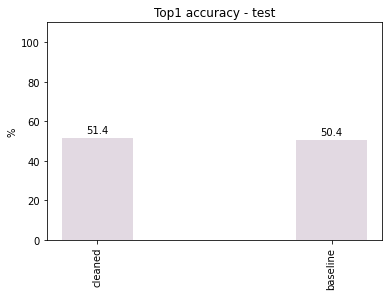

In [29]:
topn(fe, n=1, figsize=(6, 4), font =10, save = False, png_path = savepath)

<Figure size 432x288 with 0 Axes>

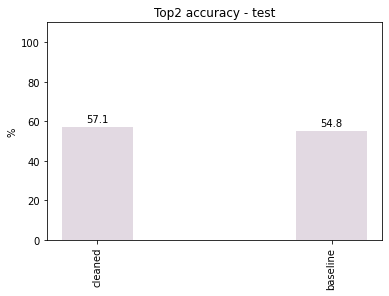

In [27]:
topn(fe, n=2, figsize=(6, 4), font =10, save = False, png_path=savepath)

In [16]:
from rdkit.Chem.rdMolHash import MolHash
from rdkit.Chem.rdMolHash import MolHash, HashFunction
from rdkit import Chem

In [18]:
accuracies_tautomers = fe.get_allexp_top_n_accuracy(topn = 1, hashing = HashFunction.HetAtomTautomer)
accuracies_tautomers

([51.59362549800797, 50.537848605577686], ['cleaned', 'baseline'])

In [19]:
accuracies_redox = fe.get_allexp_top_n_accuracy(topn = 1, hashing = HashFunction.RedoxPair)
accuracies_redox

([51.63346613545817, 50.537848605577686], ['cleaned', 'baseline'])

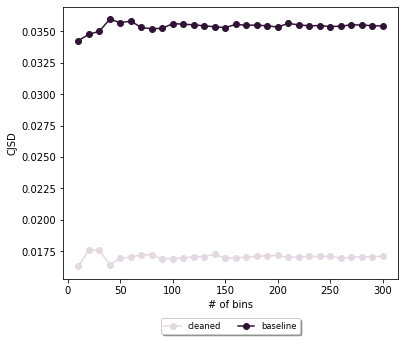

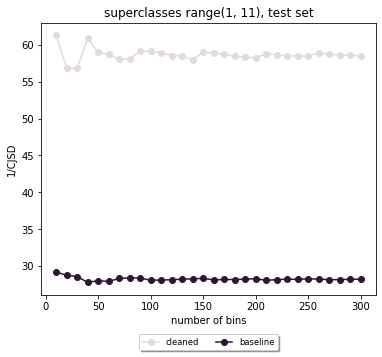

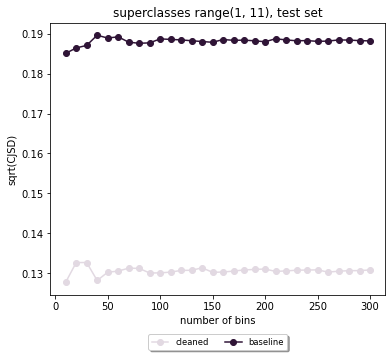

In [20]:
CJSD_vs_bins(fe, save=False, png_path=savepath, figsize=(6, 5),\
             superclasses=range(1,11), x_min = 0.5, bins_range = range(10,310,10))

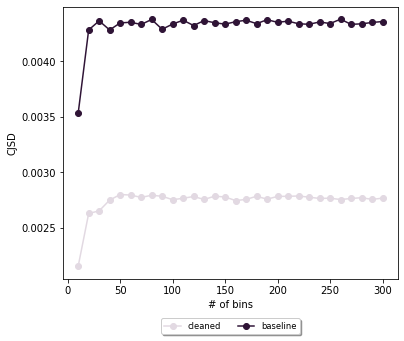

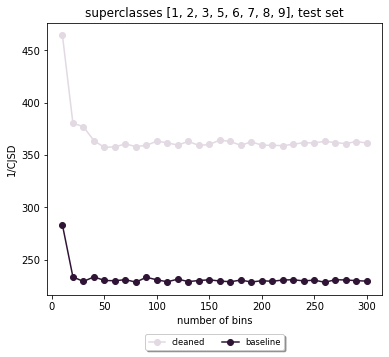

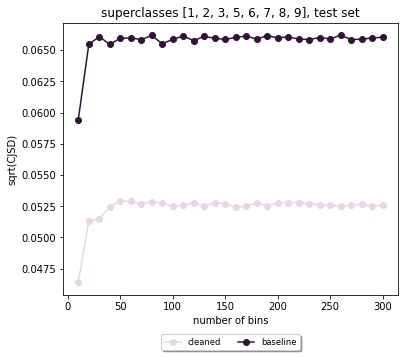

In [21]:
CJSD_vs_bins(fe, save=False, png_path=savepath, figsize=(6, 5),\
             superclasses=[1,2,3,5,6,7,8,9], x_min = 0.5, bins_range = range(10,310,10))

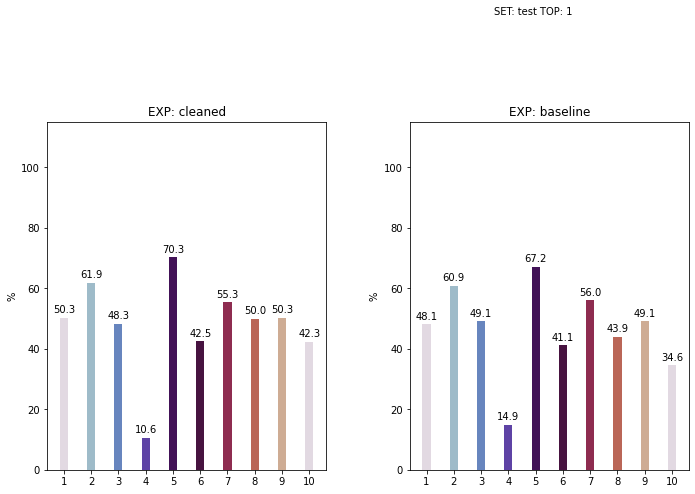

In [23]:
topn_byclass(fe, n=1,save=False, png_path=savepath, figsize=(18, 16), \
             vert_off=(0,3), font=10, ylimit=115.0, superclasses=range(1,11), hspace=0.5, wspace=0.3 )

SORRY! No correct predictions found for class 0.
SORRY! No correct predictions found for class 11.


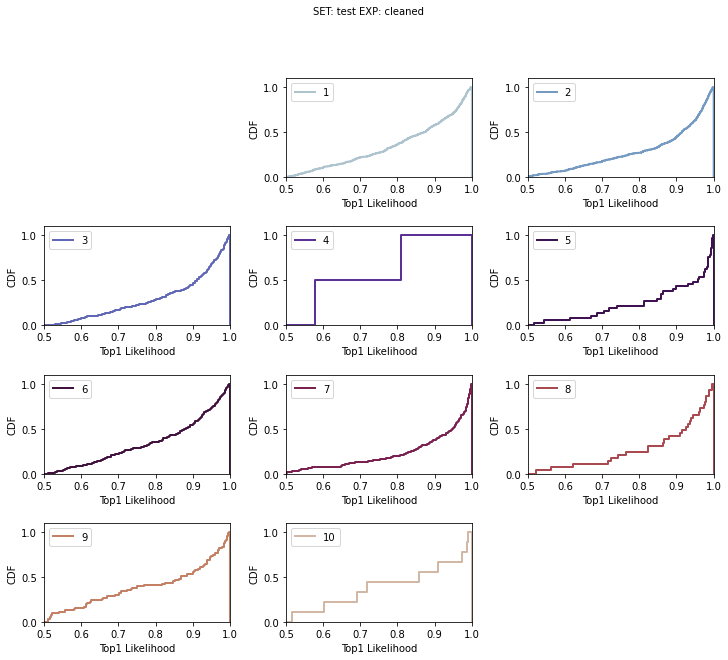

In [24]:
likelihoods_cdf_allclasses(fe, 'cleaned', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)

SORRY! No correct predictions found for class 0.
SORRY! No correct predictions found for class 11.


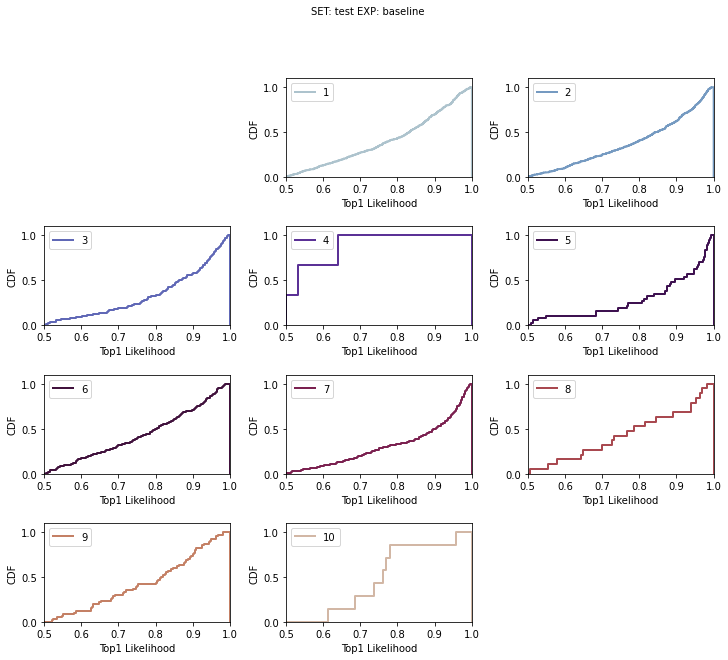

In [25]:
likelihoods_cdf_allclasses(fe, 'baseline', n=1, save=False, \
                             png_path=savepath, \
                             figsize=(12, 10), font=10, x_min = 0.5, \
                             ylimit=1.1, hspace=0.5, wspace=0.3)